# <center>Clustering : Steel Data</center>

**1. Calculate optimal  number of clusters.**<br>
**2. Assign each data point to a particular cluster.**

In [15]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
import pickle

In [16]:
# Read Data
df = pd.read_csv('train.csv')
df.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type,hour,Usage_kWh
0,-0.607869,-0.522712,-0.712161,-0.287349,0.514084,-0.845782,0,0,6,3.53
1,-0.466496,-0.522712,-0.712161,-1.723965,0.514084,-1.351516,1,0,2,2.95
2,-0.459735,-0.522712,-0.712161,-1.666394,0.514084,-1.351516,1,0,2,3.10
3,-0.466496,-0.522712,-0.712161,-1.866042,0.514084,-1.170897,1,0,3,2.74
4,2.045033,-0.522712,2.389134,0.589937,0.514084,0.274057,1,2,13,106.70


In [17]:
# Extract dependent and independent variables
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

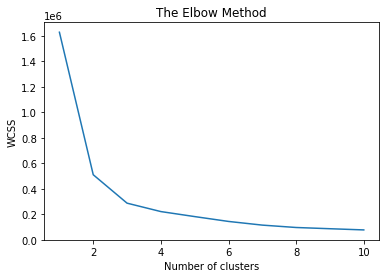

Optimal number of clusters:  3


In [18]:
# Calculate optimal no. of clusters
wcss=[]
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
print("Optimal number of clusters: ",kn.knee)

In [19]:
# Cluster data points
kmeans = KMeans(n_clusters=kn.knee, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)
df['Cluster'] = y_kmeans 
df.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type,hour,Usage_kWh,Cluster
0,-0.607869,-0.522712,-0.712161,-0.287349,0.514084,-0.845782,0,0,6,3.53,0
1,-0.466496,-0.522712,-0.712161,-1.723965,0.514084,-1.351516,1,0,2,2.95,0
2,-0.459735,-0.522712,-0.712161,-1.666394,0.514084,-1.351516,1,0,2,3.10,0
3,-0.466496,-0.522712,-0.712161,-1.866042,0.514084,-1.170897,1,0,3,2.74,0
4,2.045033,-0.522712,2.389134,0.589937,0.514084,0.274057,1,2,13,106.70,2


In [20]:
# Data points in each cluster
for i in range(kn.knee):
    l = len(df[df['Cluster'] == i])
    print("No. of datapoints in cluster",i,": ",l)

No. of datapoints in cluster 0 :  10463
No. of datapoints in cluster 1 :  8982
No. of datapoints in cluster 2 :  10339


In [21]:
# Save cluster
pickle.dump(kmeans, open("cluster.pkl", "wb" ))

In [22]:
# Save data
df.to_csv('train_cluster.csv', index = False)